In [ ]:
from rdkit import Chem
from multiprocessing import Pool
import pandas as pd
from rdkit.Chem import PandasTools

with open('data/guacamol_v1_all.smiles') as f:
    chembl_smiles = f.read().split()
n_compounds = len(chembl_smiles)

In [ ]:
smarts_strings = ['O-O', 'O-O-O', 'ON([H])O', 'N1-C=N-C=C-1', 'c1c[nH]cn1', 'N-F','*-N=C(-*)-*', 'N=C-N', 'C=N-C=C', 'S-O', 'S-O-O', 'O-N-N', 'C-!@[NX2]=[C!R,#1]-C']
substructures = [Chem.MolFromSmarts(s) for s in smarts_strings]

def match_substructures(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
        return [mol.HasSubstructMatch(p) for p in substructures]
    except:
        return None

with Pool(10) as pool:
    matches = pool.map(match_substructures, chembl_smiles)

In [ ]:
import numpy as np
matches = np.array(matches)

print('; '.join(smarts_strings))
print('; '.join(str(i) for i in matches.sum(0)))
chembl_smiles_np = np.array(chembl_smiles)

O-O; O-O-O; ON([H])O; N1-C=N-C=C-1; c1c[nH]cn1; N-F; *-N=C(-*)-*; N=C-N; C=N-C=C; S-O; S-O-O; O-N-N; C-!@[NX2]=[C!R,#1]-C
3268; 1; 4; 1; 39407; 2; 175328; 76390; 5473; 14322; 12; 967; 5791


,SMARTS,Mol,Counts
0,O-O,,3268
1,O-O-O,,1
2,ON([H])O,,4
3,N1-C=N-C=C-1,,1
4,c1c[nH]cn1,,39407
5,N-F,,2
6,*-N=C(-*)-*,,175328
7,N=C-N,,76390
8,C=N-C=C,,5473
9,S-O,,14322

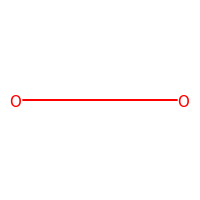
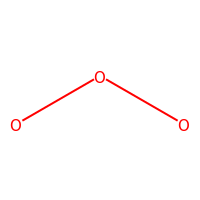
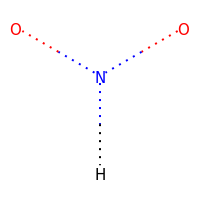
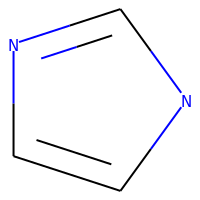
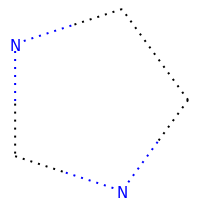
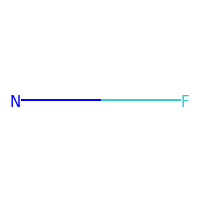
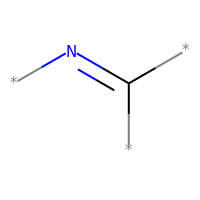
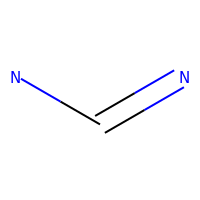
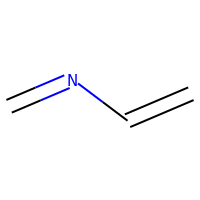
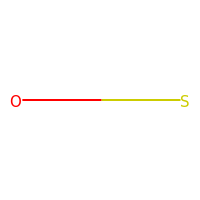
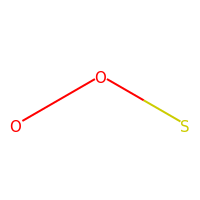
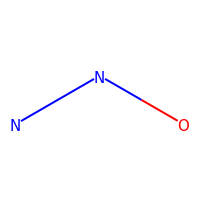
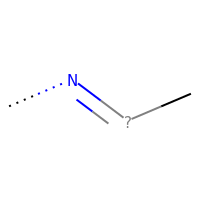

In [ ]:
from IPython.display import display
df = pd.DataFrame({'SMARTS': smarts_strings, 'Mol': substructures, 'Counts': matches.sum(0)})
display(HTML(df.to_html(escape=False)))

In [ ]:
df_filtered = df[df['Counts']<15]
HTML(df_filtered.to_html())

In [ ]:
df_filtered['#'] = range(1, len(df_filtered)+1)
df_filtered['rel. freq.'] = df_filtered['Counts'] / n_compounds
print(df_filtered[['#', 'SMARTS', 'Counts', 'rel. freq.']].to_latex(index=False))

\begin{tabular}{rlrr}
\toprule
 \# &        SMARTS &  Counts &    rel. freq. \\
\midrule
 1 &  O-O-O &  1 &  6.283862e-07 \\
 2 &  ON([H])O &  4 &  2.513545e-06 \\
 3 &  N1-C=N-C=C-1 &  1 &  6.283862e-07 \\
 4 &  N-F &  2 &  1.256772e-06 \\
 5 &  S-O-O &  12 &  7.540635e-06 \\
\bottomrule
\end{tabular}



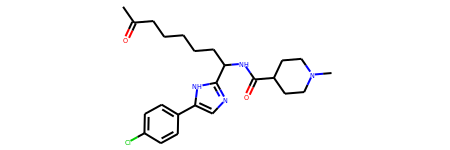

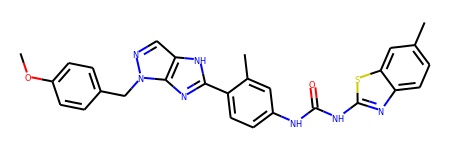

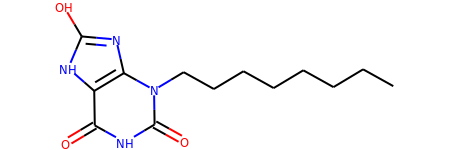

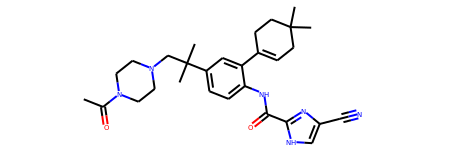

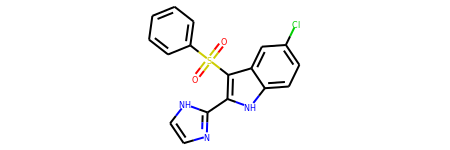

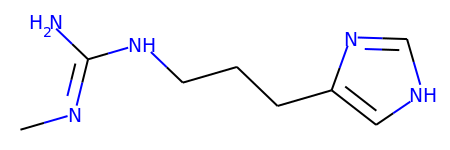

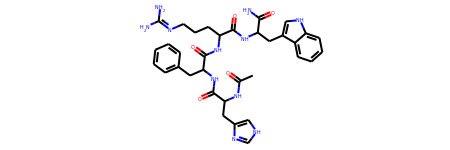

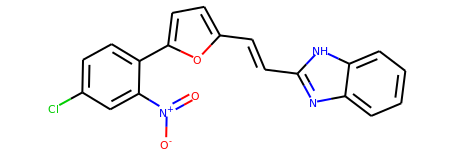

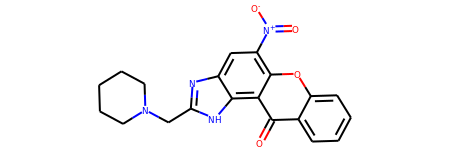

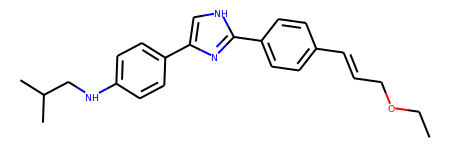

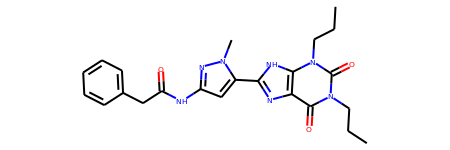

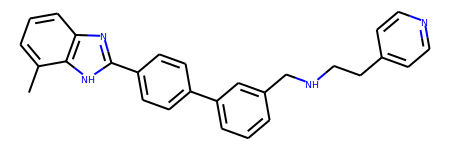

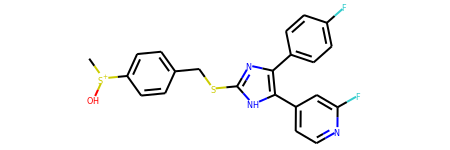

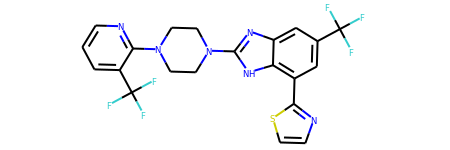

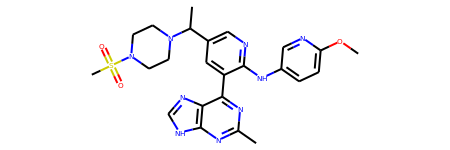

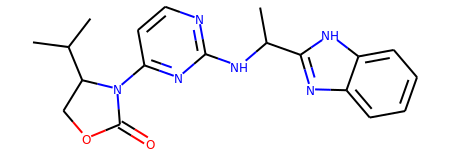

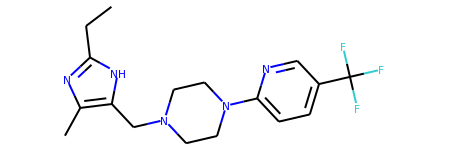

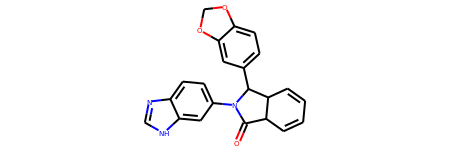

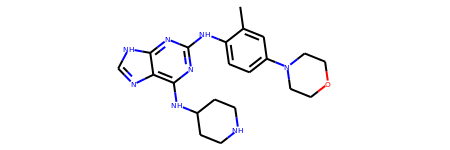

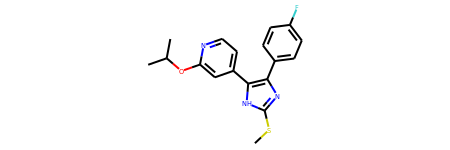

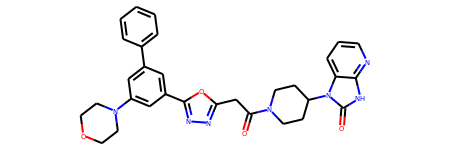

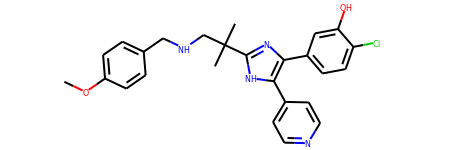

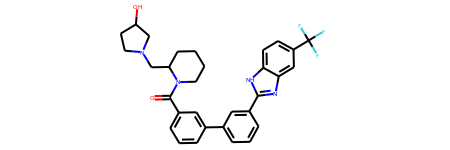

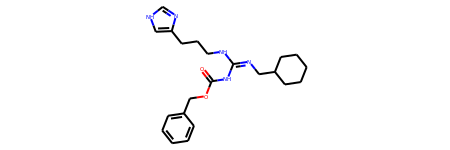

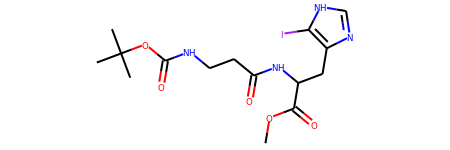

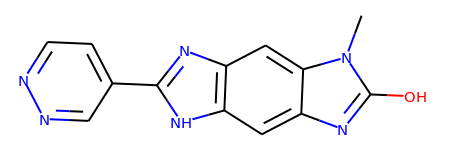

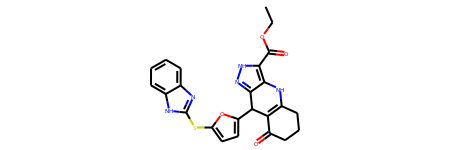

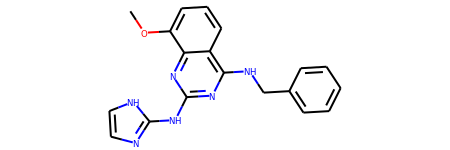

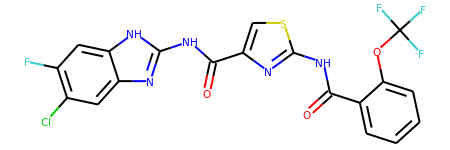

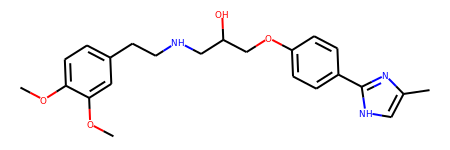

In [ ]:
for i in range(30):
    display(Chem.MolFromSmiles(chembl_smiles_np[matches[:,4]][i]))

In [ ]:
chembl_smiles_np[matches[:,1]][0]

'O=S(=O)(O)c1cc(N=Nc2ccc3cc(SOOO)ccc3c2)c(O)c2ncccc12'

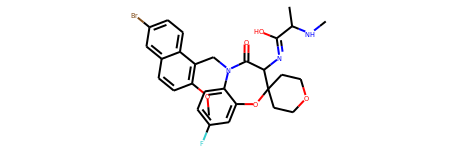

In [ ]:
s = chembl_smiles_np[matches[:,-1]][10000]
m = Chem.MolFromSmiles(s)
# 
m

True


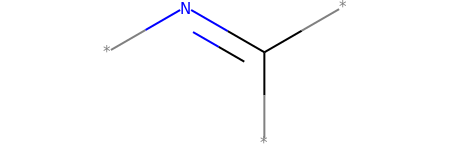

In [ ]:
p = Chem.MolFromSmarts('*-N=C(-*)-*')
print(m.HasSubstructMatch(p))
p

In [ ]:


df = pd.read_csv('/home/lfr/Downloads/DOWNLOAD-bGxOa7WMXUE0NN6ZKzAhPRjpjNgO-KtkZjIlyPHO01c=.csv', sep=';')

In [ ]:
c = df['Smiles']
smiles_new = c[~pd.isna(c)]
smiles_new

27               COc1ccc(-c2cnn3c(=O)c(-c4ccsc4)c[nH]c23)cc1
29                            CC(Cn1ccnc1)NC(=O)N(C)Cc1ccco1
34                COc1ccccc1C1CN(CCNC(=O)c2cscn2)Cc2ccccc2O1
46         CC(C)C[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@H](CC...
50         COc1ccc(C2CC(c3cc(Cl)c(C)cc3O)=NN2c2ccc(S(N)(=...
                                 ...                        
1961457      COc1ccc(/C=C2\C(=O)NC(=S)N2C(=O)c2ccc(C)cc2)cc1
1961458    COc1cccc(N/C([S-])=C(/C(=O)c2ccc(C)c([N+](=O)[...
1961459    C=CCOc1ccc(/C=C\c2nc(O)c([N+](=O)[O-])c(O)n2)c...
1961460      Cc1nc(SCC(=O)c2ccc(F)c(F)c2)nc(O)c1Oc1ccc(F)cc1
1961461                   O=C1c2ccccc2N[C@@H]2C=CC[C@@H]2N1O
Name: Smiles, Length: 1941411, dtype: object

In [ ]:
for i, s in enumerate(smiles_new):
    if 'OOO' in s:
        print(i, s)

441689 O=S(=O)(O)c1cc(/N=N\c2ccc3cc(SOOO)ccc3c2)c(O)c2ncccc12


In [ ]:
alerts = pd.read_csv('alert_collection.csv')
alerts

,rule_id,rule_set,description,smarts,rule_set_name,priority,max
0,1,1,R1 Reactive alkyl halides,"[Br,Cl,I][CX4;CH,CH2]",Glaxo,8,0
1,2,1,R2 Acid halides,"[S,C](=[O,S])[F,Br,Cl,I]",Glaxo,8,0
2,3,1,R3 Carbazides,O=CN=[N+]=[N-],Glaxo,8,0
3,4,1,R4 Sulphate esters,"COS(=O)O[C,c]",Glaxo,8,0
4,5,1,R5 Sulphonates,"COS(=O)(=O)[C,c]",Glaxo,8,0
...,...,...,...,...,...,...,...
1246,1247,8,too many cyano Groups (>1),C#N.C#N,LINT,2,0
1247,1248,8,too many COOH groups (>1),[CX3](=O)[OH1].[CX3](=O)[OH1],LINT,2,0
1248,1249,8,amino acid,[NH2][CX4]C(=O)O,LINT,2,0
1249,1250,8,chlorates,Cl~O,LINT,2,0


In [ ]:
alerts_patterns = {k: Chem.MolFromSmarts(v) for k,v in zip(alerts['description'], alerts['smarts'])}
alerts_patterns

{'R1 Reactive alkyl halides': <rdkit.Chem.rdchem.Mol at 0x7efdb7da4800>,
 'R2 Acid halides': <rdkit.Chem.rdchem.Mol at 0x7efdb7b56f80>,
 'R3 Carbazides': <rdkit.Chem.rdchem.Mol at 0x7efdb7b563f0>,
 'R4 Sulphate esters': <rdkit.Chem.rdchem.Mol at 0x7efdb7b56990>,
 'R5 Sulphonates': <rdkit.Chem.rdchem.Mol at 0x7efdb7a53ee0>,
 'R6 Acid anhydrides': <rdkit.Chem.rdchem.Mol at 0x7efdb804cad0>,
 'R7 Peroxides': <rdkit.Chem.rdchem.Mol at 0x7efdb804c530>,
 'R8 Pentafluorophenyl esters': <rdkit.Chem.rdchem.Mol at 0x7efdb7b34da0>,
 'R9 Paranitrophenyl esters': <rdkit.Chem.rdchem.Mol at 0x7efdb7b34850>,
 'R10 esters of HOBT': <rdkit.Chem.rdchem.Mol at 0x7efdb7b34e40>,
 'R11 Isocyanates & Isothiocyanates': <rdkit.Chem.rdchem.Mol at 0x7efdb79ad580>,
 'R12 Triflates': <rdkit.Chem.rdchem.Mol at 0x7efdb7cefad0>,
 "R13 lawesson's reagent and derivatives": <rdkit.Chem.rdchem.Mol at 0x7efdb7ceff80>,
 'R14 phosphoramides': <rdkit.Chem.rdchem.Mol at 0x7efdb7cef120>,
 'R15 Aromatic azides': <rdkit.Chem.rdche

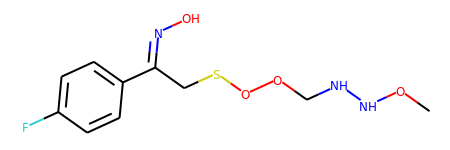

R7 Peroxides
Aliphatic long chain
het-C-het not in ring
oxime
Oxygen-nitrogen single bond
peroxide
sulfur oxygen single bond
non_ring_CH2O_acetal
sulf_D2_oxygen_D2
imines_(not_ring)
Oxime
Nitrosone_not_nitro
Long aliphatic chain
Unbranched chain
Hetero_hetero
Filter20_hydrazine
Filter31_so_bond
Filter32_oo_bond
Filter89_hydroxylamine
acyclic N-,=N and not N bound to carbonyl or sulfone
acyclic NO not nitro
43


In [ ]:
s = 'C1=NC=CN1'
s = 'Fc1ccc(C(=NO)CSOOCNNOC)cc1'
m = Chem.MolFromSmiles(s)
display(m)

for name, p in alerts_patterns.items():
    if m.HasSubstructMatch(p):
        print(name)